In [2]:
import math

def average(x):
    assert len(x) > 0
    return float(sum(x)) / len(x)

def pearson_def(x, y):
    assert len(x) == len(y)
    n = len(x)
    assert n > 0
    avg_x = average(x)
    avg_y = average(y)
    diffprod = 0
    xdiff2 = 0
    ydiff2 = 0
    for idx in range(n):
        xdiff = x[idx] - avg_x
        ydiff = y[idx] - avg_y
        diffprod += xdiff * ydiff
        xdiff2 += xdiff * xdiff
        ydiff2 += ydiff * ydiff
    
    return diffprod / math.sqrt(xdiff2 * ydiff2)

# Permutation test for correlation

In [1]:
x = [2,4,5,6,7,12]
y = [18,22,17,18,14,13]

# First we calculate the orginal correlation

In [4]:
org_cor = pearson_def(x, y)
org_cor

-0.7465659667474605

# Now we implemente a permutation test. X values stay the same, while we are goinge to shuffle Y values, and calculate the correlation between this new set of data

In [62]:
# Create permutation function (recursive), so we input the list of values and it returns a list of all permutations
# In this case 6! = 720 possible permutations

# Python function to print permutations of a given list
def permutation(list_values):
 
    # If list_values is empty then there are no permutations
    if len(list_values) == 0:
        return []
 
    # If there is only one element in list_values then, only
    # one permutation is possible
    if len(list_values) == 1:
        return [list_values]
 
    # Find the permutations for list_values if there are
    # more than 1 characters
 
    list_permutations = [] # empty list that will store current permutation
 
    # Iterate the input(list_values) and calculate the permutation
    for i in range(len(list_values)):
        m = list_values[i]
 
       # Extract list_values[i] or m from the list.  remlist_values is
       # remaining list
        remlist_values = list_values[:i] + list_values[i+1:]
 
       # Generating all permutations where m is first
       # element
        for p in permutation(remlist_values):
            list_permutations.append([m] + p)
    return list_permutations

In [65]:
# Create the list of permutations

list_permutations = permutation(y)

permutation_correlations = []

for new_y in list_permutations:
    cor_perm = pearson_def(x, new_y)
    permutation_correlations.append(cor_perm)

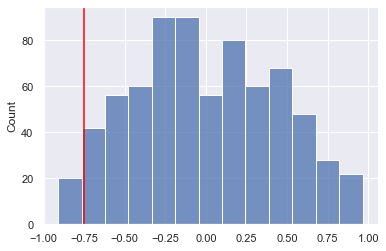

In [73]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")

sns.histplot(permutation_correlations)
plt.axvline(-0.75, 80,0, color='red')
plt.show()

In [81]:
import numpy as np

# What is the percentage of correlations below -0.75?

len(np.where(np.array(permutation_correlations) < -0.75)[0])/ len(permutation_correlations) * 100

3.3333333333333335

# New Conclusion: I really didn't remember this permutation test, and I have to say its a great way of testing correlations, and also testing means of two groups, skewness of two distributions and more kind of metrics. Furthermore, you don't need to make any assumption, like in t-test.  
# So, now, looking at the histogram we can realize that the original correlation of -0.75 is on the left side of the distribution. The percentage of values below -0.75 is 3.3% .
